<a href="https://colab.research.google.com/github/klarcika/TZ/blob/main/Naloga7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# 1. V tej datoteki naj ne bi bilo več manjkajočih podatkov,
# jih je pa potrebno še prilagoditi.
# Zato kategorične podatke zamenjajte z indikacijskimi parametri
# (dummy vrednostmi), številske stolpce (razen Score_Result) pa
# standardizirajte. Score_Result bomo kasneje uporabili kot izhodni razred.

import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("university_no_nan.csv")
izhod = df["Score_Result"]
kategoricni = df.select_dtypes(include=["object", "category"]).columns
numericni = df.select_dtypes(include=["int64", "float64"]).columns
numericni=numericni.drop('Score_Result')
df = pd.get_dummies(df, columns=kategoricni)
scaler = StandardScaler()
df[numericni] = scaler.fit_transform(df[numericni])

In [17]:
# 2. Množico razdelite na učno in testno tako,
#  da bo testna množica velika 30%,
#  ostali podatki pa naj bodo uporabljeni za učno množico.
#  Naključno stanje naj bo 789. Napovedovali bomo podatek Score_Result.
# Za vhodne podatke uporabite vse stolpce razen izhodnega razreda in
# stolpca Rank.Za algoritem uporabite linearno regresijo.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Izberite stolpce za izhod in stolpce, ki jih želite odstraniti
columns_to_drop = ["Score_Result", "Rank"]

# Izberite vse stolpce razen tistih, ki jih želite odstraniti
vhod = df.drop(columns=columns_to_drop)

x_train, x_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.3, random_state=789)
lr= LinearRegression()
lr.fit(x_train, y_train)
rezultat= lr.predict(x_test)


In [18]:
# 3. Ustvarite dataframe, katerega prvi stolpec bodo predstavljale
# dejanske vrednosti, drugi stolpec pa napovedane vrednosti modela.
#  Izpišite prvih 5 vrstic tega datafram-a.
df2= pd.DataFrame({'Dejanske vrednosti': y_test, 'Napovedane vrednosti': rezultat})
df2[:5]

,Dejanske vrednosti,Napovedane vrednosti
767,29.3,29.804688
1092,19.8,19.122070
335,45.4,46.995605
1128,18.9,18.102539
107,61.5,60.857422


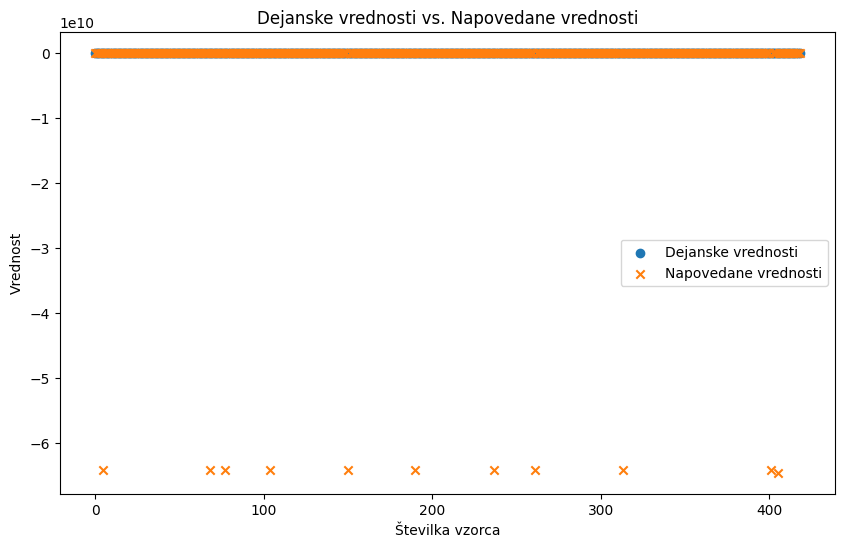

In [19]:
#4. Podatke iz datafram-a izrišite v obliki grafa z dvema krivuljama
# - ena krivulja naj predstavlja dejanske vrednosti, druga krivulja pa napovedane vrednosti.
import matplotlib.pyplot as plt

# Plot z drugačnim grafom
plt.figure(figsize=(10, 6))

# Dejanske vrednosti
plt.scatter(range(len(y_test)), y_test, label='Dejanske vrednosti', marker='o')

# Napovedane vrednosti
plt.scatter(range(len(rezultat)), rezultat, label='Napovedane vrednosti', marker='x')

plt.title('Dejanske vrednosti vs. Napovedane vrednosti')
plt.xlabel('Številka vzorca')
plt.ylabel('Vrednost')
plt.legend()
plt.show()




In [20]:
#5 poleg vseh zapisi komentar kaj merimo s temi,
# in kakšna more biti njena vrednost (cim večja/manjša), da vemo kdaj je model dober
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
m1= mean_absolute_error(y_test, rezultat)
#Pomen: MAE meri povprečno absolutno razliko med dejanskimi (y_test) in napovedanim y_pred=rezultatom vrednostmi.
#Višje vrednosti pomenijo večje napake.

m2=mean_squared_error(y_test, rezultat)
# Pomen: MSE meri povprečno kvadratno napako med dejanskimi in napovedanimi vrednostmi.
# Kvadratne napake imajo večji vpliv na rezultat kot absolutne napake.

r2=r2_score(y_test, rezultat)
#Pri R2 score morajo rezultati biti manjši, saj merimo raznolikost v odzivnih spremenljivkah, ki jih model poskusa napovedati
#model je dobro napovedal/ uspešen, če je napovedana številka čim manjša/ se približuije 0

print(m1)
print(m2)
print(r2)

1684261977.9904797
1.080543796554217e+20
-3.638858399384906e+17


In [21]:
# 6. Ponovite regresijo iz 2. točke, le da zdaj za vhodne podatke uporabite vse
#  stolpce razen izhodnega razreda ter stolpcev Rank, Teaching, Research in Citations.
# Primerjajte v katerem primeru dobite boljše rezultate.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Izberite stolpce za izhod in stolpce, ki jih želite odstraniti
columns_to_drop = ["Score_Result", "Rank","Teaching","Research", "Citations"]
# Izberite vse stolpce razen tistih, ki jih želite odstraniti
vhod = df.drop(columns=columns_to_drop)

x_train, x_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.3, random_state=789)
lr= LinearRegression()
lr.fit(x_train, y_train)
rez= lr.predict(x_test)
#---------- izpis--------
m1= mean_absolute_error(y_test, rez)
m2=mean_squared_error(y_test, rez)
r2=r2_score(y_test, rez)
print(m1)
print(m2)
print(r2)

10898140174.203768
4.5240567184530557e+21
-1.5235293415902376e+19


In [37]:
# 7. Podatke razdelite na učno in testno množico s pomočjo
# navzkrižne validacije (KFold) s petimi rezi. Še vedno napovedujete Score_Result,
# kot vhodne podatke pa uporabite tisto kombinacijo, ki je prej dala boljše rezultate.
# Merite srednjo absolutno napako. S pomočjo te navzkrižne validacije preizkusite
# naslednje regresijske algoritme:

# linearno regresijo,
# regresijsko drevo,
#  regresijo z linearno metodo podpornih vektorjev,
# regresor naključnega gozda in
# ExtraTreesRegressor.
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Izberi kombinacijo vhodnih podatkov, ki je dala boljše rezultate
# Predpostavljamo, da so vhod in izhod že definirani

# Definiramo modele
modeli = {
    'Linearna regresija': LinearRegression(),
    'Regresijsko drevo': DecisionTreeRegressor(),
    'Regresija z linearno metodo podpornih vektorjev': SVR(),
    'Regresor naključnega gozda': RandomForestRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor()
}

# Razdelimo podatke na učno in testno množico s pomočjo KFold
kf = KFold(n_splits=5, shuffle=True, random_state=789)

# Pripravimo prazne sezname za shranjevanje rezultatov
model_names = []
avg_mae_scores = []

# Izvedemo navzkrižno validacijo za vsak model
for model_name, model in modeli.items():
    # Izvedemo navzkrižno validacijo za trenutni model
    scores = cross_val_score(model, vhod, izhod, cv=kf, scoring="neg_mean_absolute_error")

    if scores is not None and len(scores) > 0:  # Preverimo, ali so rezultati na voljo
        # Izračunamo povprečno srednjo absolutno napako za model
        avg_mae = -scores.mean()

        # Shranimo rezultate v sezname
        model_names.append(model_name)
        avg_mae_scores.append(avg_mae)

        # Izpišemo rezultate
        print(f"{model_name}: Srednja absolutna napaka = {avg_mae}")



Linearna regresija: Srednja absolutna napaka = 1252293972.6536877
Regresijsko drevo: Srednja absolutna napaka = 1.9271697388632874
Regresija z linearno metodo podpornih vektorjev: Srednja absolutna napaka = 2.3516089460319067
Regresor naključnega gozda: Srednja absolutna napaka = 1.1562047183819761
ExtraTreesRegressor: Srednja absolutna napaka = 0.9046938504864318


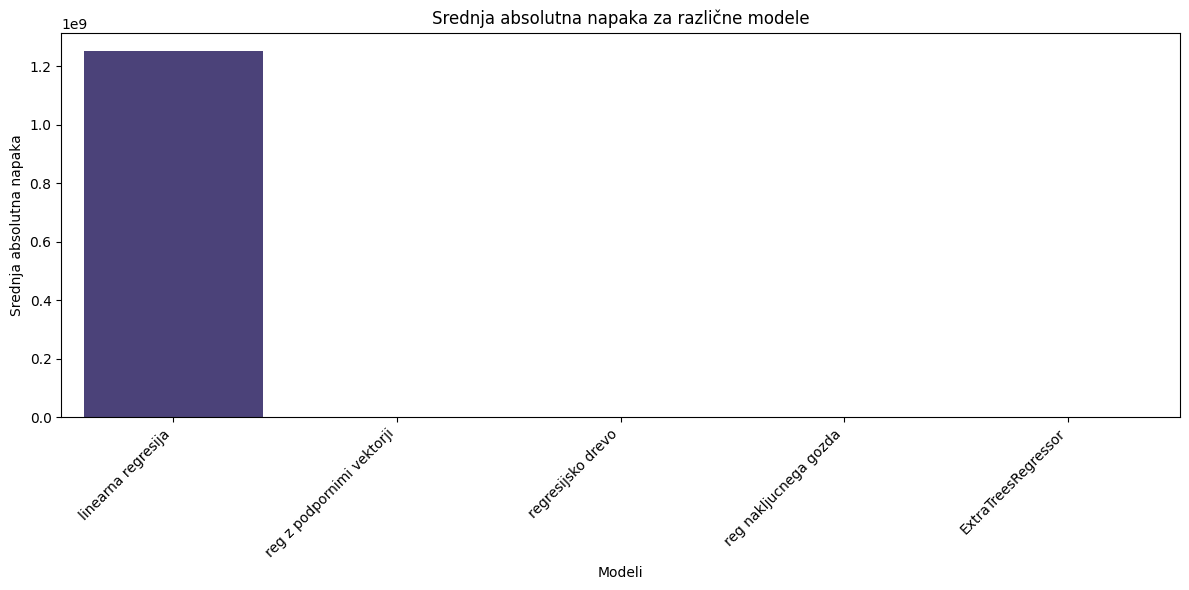

In [38]:
#8. Izrišite graf, ki bo prikazal srednjo absolutno napako za vse uporabljene algoritme.
# Pripravimo podatke za graf v obliki DataFrame
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Srednja absolutna napaka', data=df_plot, palette='viridis')
plt.title('Srednja absolutna napaka za različne modele')
plt.xlabel('Modeli')
plt.ylabel('Srednja absolutna napaka')
plt.xticks(rotation=45, ha='right')  # Povrni oznake x-osi za 45 stopinj
plt.tight_layout()  # Poskrbi za pravilno postavitev oznak
plt.show()

In [31]:
# 9. S pomočjo iskanja po mreži poiščite najboljše nastavitve parametrov za
# regresor naključnega gozda. Pri iskanju naj preizkusi naslednje kombinacije
# vrednosti parametrov: criterion = {“mse”, “mae”}, max_depth = {5, 10, 15, 20}
# in max_features = {“auto”, “sqrt”, “log2”}. Pri deljenju na folde uporabite 10 rezov,
# meri pa se naj koeficient določljivosti (R^2 score).
#  Izpišite najboljše nastavitve parametrov in najboljši rezultat
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definiramo podatke
columns_to_drop = ["Score_Result", "Rank"]
vhod = df.drop(columns=columns_to_drop)
# Definiramo parametre za iskanje po mreži
parametri = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}
regresor = RandomForestRegressor()
grid_search = GridSearchCV(regresor, parametri, cv=10, scoring="r2")
grid_search.fit(vhod, izhod)

# Izpišemo najboljše nastavitve parametrov in rezultat
print("Najboljše nastavitve parametrov:", grid_search.best_params_)
print("Najboljši rezultat (R^2 score):", grid_search.best_score_)




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Najboljše nastavitve parametrov: {'criterion': 'squared_error', 'max_depth': 15, 'max_features': 'auto'}
Najboljši rezultat (R^2 score): -1.7359933069147182
